# **CNN model for the Fashion MNIST dataset**

In the last notebook, you have implemented a neural network model for the Fashion MNIST dataset, what was your model's accuracy on the testing set? Do you think we can further improve it?

\
In this notebook you will implement a Convolutional Neural Network (CNN) model to improve the prediction accuracy

\
**Instruction: type your code when you see 'Type your code here' in comments**

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Tensorflow version:',tf.__version__)
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from sklearn.model_selection import train_test_split

import os
print('Keras version:', tf.keras.__version__)

Num GPUs Available:  1
Tensorflow version: 2.6.0
Keras version: 2.6.0


# Loading the fashion_mnist data set training set

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f'Shape of an image: {x_train[0].shape}')
print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Classes: {np.unique(y_train)}')

Shape of an image: (28, 28)
Max pixel value: 255
Min pixel value: 0
Classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Creating a list of labels

fashion_mnist_labels = ["T-shirt/top", 
                            "Trouser",
                            "Pullover",
                            "Dress",
                            "Coat",
                            "Sandal", 
                            "Shirt",
                            "Sneaker",
                            "Bag",
                            "Ankle boot"]

# Plotting some of the images



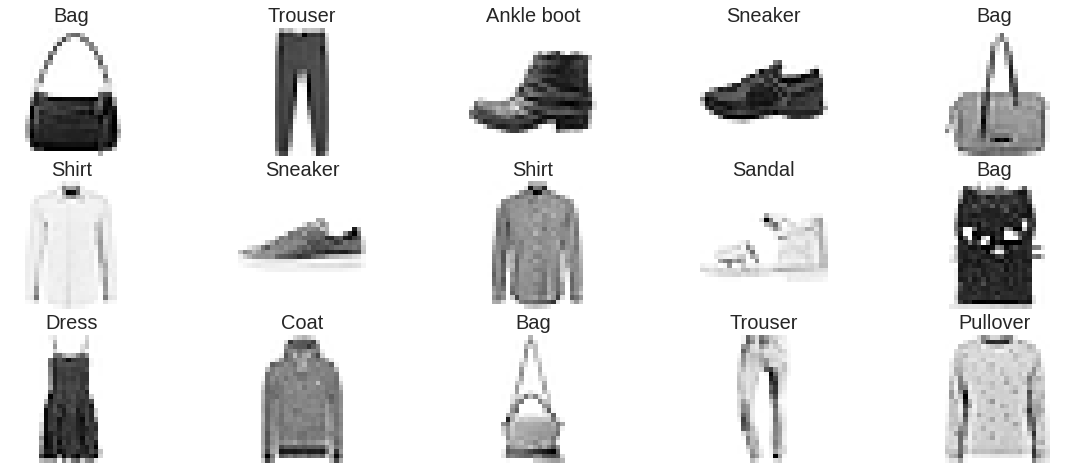

In [ ]:
figure = plt.figure(figsize=(20,8))

indices = np.random.choice(np.arange(x_train.shape[0]), 15, replace=False)
subset = x_train[indices]

for i, image_sample in enumerate(subset):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  j = fashion_mnist_labels[y_train[indices[i]]] #image label
  ax.set_title(j, fontsize=20)
  ax.imshow(image_sample.reshape(28,28))
  i+=1

In [ ]:
#Type your code here

x_train = x_train/255 #feature scaling (Hint:255 is the maximum pixel value)
x_test = x_test/255

num_classes = 10 #no. of classes

train_one_hot = tf.keras.utils.to_categorical(y_train,num_classes) #one hot encoding for the training set
test_one_hot = tf.keras.utils.to_categorical(y_test,num_classes)   #one hot encdoing for the testing set

print(y_train[0])
print(train_one_hot[0])


train_size = x_train.shape[0]
test_size = x_test.shape[0]


print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Train size: {train_size}, Test size: {test_size}')
print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')
print(f'Train label shape: {train_one_hot.shape}, Test label shape: {test_one_hot.shape}')


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Max pixel value: 1.0
Min pixel value: 0.0
Train size: 60000, Test size: 10000
Train data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)
Train label shape: (60000, 10), Test label shape: (10000, 10)


# **Model training**

## Task: In this section, we are going to define our CNN model

***Implement a CNN according to the below figure, it consists of:***


1.   **a CNN layer**
> No. of filter = 2,
> Kernel size = (3,3),
> Strides = (1,1),
> Padding = 'same',
> Activation='relu'
2.   **a pooling layer (try MaxPooling2D first, then AveragePooling2D to compare accuracy)**
> Pool size = (2,2), Strides = (1,1)
3.   **a flatten layer**
4.   **a dense layer**
> No. of hidden units = 100, Activation = 'relu'
5.   **an output (dense) layer**
> Activation = 'softmax'
**Hint: Remember to specify the input shape in the first layer**



![](https://drive.google.com/uc?export=view&id=1mZ33zg7PwfVNXF9ea-39fu_biV43FFYO)

**Links to the documentation for your reference:**

Pooling layer:
https://keras.io/api/layers/pooling_layers/


Flatten layer:
https://keras.io/api/layers/reshaping_layers/flatten/

Convolutional layer:
https://keras.io/api/layers/convolution_layers/convolution2d/

Dense layer:
https://keras.io/api/layers/core_layers/dense/







In [ ]:
#Type your code here

# Reshaping the data
INPUT_SHAPE = [28,28,1] #input shape for one image

x_train = x_train.reshape([-1]+INPUT_SHAPE)
x_test = x_test.reshape([-1]+INPUT_SHAPE)

print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')

Train data shape: (60000, 28, 28, 1), Test data shape: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *


tf.keras.backend.clear_session()

#Type your code here

#Define and compile your model here
#=============================================

inputs = tf.keras.Input(shape=INPUT_SHAPE)

x = Conv2D(filters = 2, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(inputs)
x = MaxPooling2D(pool_size = (2,2), strides = (1,1))(x)
x = Flatten()(x)
x = Dense(units=100, activation='relu')(x)
output = Dense(units=num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=output, name="cnn_mnist_model")




#=============================================


sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'
)

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)


model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=["accuracy"],
)


model.summary()

Model: "cnn_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 2)         20        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 2)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1458)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               145900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 146,930
Trainable params: 146,930
Non-trainable params: 0
_____________________________________________

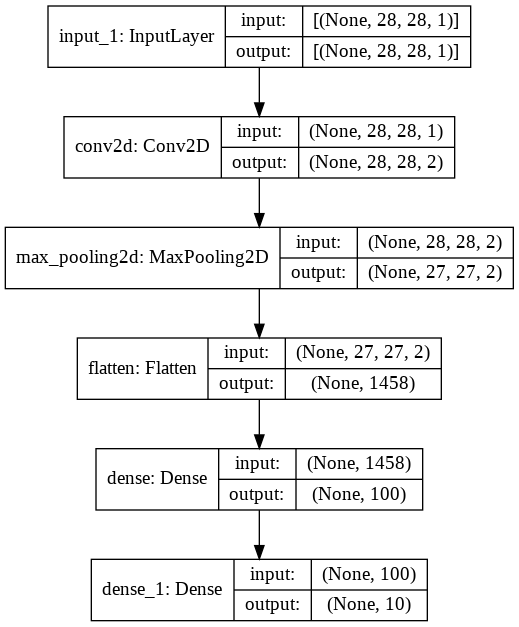

In [ ]:
tf.keras.utils.plot_model(model, "cnn_model.png", show_shapes=True)

## **Defining callback functions and training the model**

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

#Type your code here
batch_size = 100 # 100 - 150
epoch = 100

#Early Stopping callback function
es = EarlyStopping(
    monitor='val_accuracy',
    min_delta = 0,
    patience = 5,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

# Starting the training
history = model.fit(x_train, train_one_hot, epochs=epoch, batch_size = batch_size, validation_split=0.3, callbacks=[es]) #calling model.fit()




Epoch 1/100
420/420 [==============================] - 4s 6ms/step - loss: 0.5555 - accuracy: 0.8173 - val_loss: 0.4005 - val_accuracy: 0.8559
Epoch 2/100
420/420 [==============================] - 2s 6ms/step - loss: 0.3638 - accuracy: 0.8723 - val_loss: 0.3599 - val_accuracy: 0.8709
Epoch 3/100
420/420 [==============================] - 2s 6ms/step - loss: 0.3278 - accuracy: 0.8829 - val_loss: 0.3411 - val_accuracy: 0.8792
Epoch 4/100
420/420 [==============================] - 2s 5ms/step - loss: 0.3050 - accuracy: 0.8880 - val_loss: 0.3341 - val_accuracy: 0.8806
Epoch 5/100
420/420 [==============================] - 2s 6ms/step - loss: 0.2798 - accuracy: 0.8987 - val_loss: 0.3150 - val_accuracy: 0.8873
Epoch 6/100
420/420 [==============================] - 2s 6ms/step - loss: 0.2612 - accuracy: 0.9047 - val_loss: 0.3070 - val_accuracy: 0.8923
Epoch 7/100
420/420 [==============================] - 2s 6ms/step - loss: 0.2466 - accuracy: 0.9085 - val_loss: 0.2988 - val_accuracy: 0.8952

# **Plotting the learning curves**

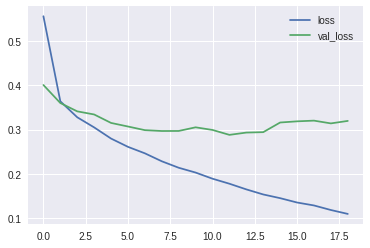

In [ ]:
res = pd.DataFrame(history.history)
res[['loss','val_loss']].plot()

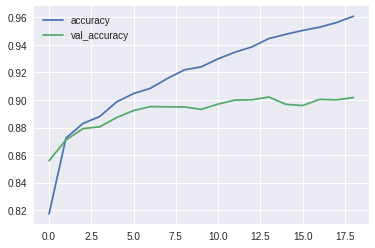

In [ ]:
res[['accuracy','val_accuracy']].plot()

# **Model evaluation on test set**

In [ ]:
scores = model.evaluate(x_test, test_one_hot, verbose=1)
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.3128 - accuracy: 0.8938
loss: 0.3128
accuracy: 0.8938


# **Making predictions and plotting the result**

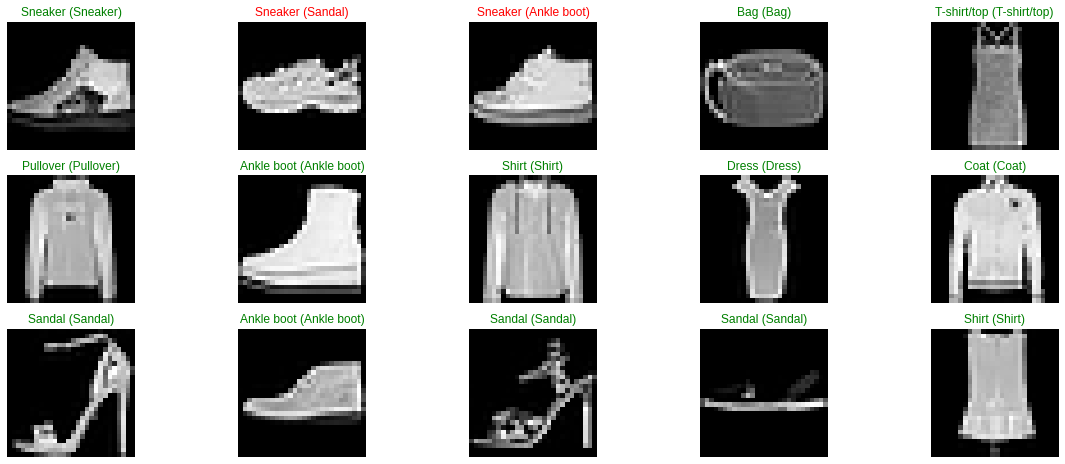

In [ ]:
prediction = model.predict(x_test)


figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(x_test[index].reshape(28,28), cmap='gray')
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(test_one_hot[index])
   
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Are you satisfied with this model? Can the model be further improved?